## Homework-3: ConvNet for MNIST Classification

### In this homework, you need to
- #### implement the forward and backward functions for ConvLayer (`layers/conv_layer.py`)
- #### implement the forward and backward functions for PoolingLayer (`layers/pooling_layer.py`)
- #### implement the forward and backward functions for DropoutLayer (`layers/dropout_layer.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from network import Network
from solver import train, test
from plot import plot_loss_and_acc
from mnist_data_loader import read_data_sets

## Load MNIST Dataset
We use mnist_data_loader.py to load the dataset.

In [2]:
dataset = read_data_sets("MNIST_data", one_hot=True, validation_size=5000)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
# subtract by the mean value
mean_val = dataset.train.images.mean()
dataset.train._images -= mean_val
dataset.test._images -= mean_val
dataset.validation._images -= mean_val

# reshape to Nx1x28x28
dataset.train._images = dataset.train._images.reshape(-1, 1, 28, 28)
dataset.test._images = dataset.test._images.reshape(-1, 1, 28, 28)
dataset.validation._images = dataset.validation._images.reshape(-1, 1, 28, 28)

print("Dataset size: Training {}, Validation {}, Test {}"\
    .format(dataset.train.num_examples, dataset.validation.num_examples,
            dataset.test.num_examples))

Dataset size: Training 55000, Validation 5000, Test 10000


In [4]:
batch_size = 75
max_epoch = 5
init_std = 0.01

learning_rate = 0.001
weight_decay = 0.010

disp_freq = 10

## Criterion and Optimizer

In [5]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [6]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [18]:
# Train
convNet.is_training = True
convNet, train_loss, train_acc, val_loss, val_acc = \
    train(convNet, criterion, sgd, dataset.train, dataset.validation, max_epoch, batch_size, disp_freq)

Epoch [0][5]	 Batch [0][733]	 Training Loss 19.3751	 Accuracy 0.0533
Epoch [0][5]	 Batch [10][733]	 Training Loss 16.6967	 Accuracy 0.1321
Epoch [0][5]	 Batch [20][733]	 Training Loss 12.5074	 Accuracy 0.1854
Epoch [0][5]	 Batch [30][733]	 Training Loss 10.6566	 Accuracy 0.2000
Epoch [0][5]	 Batch [40][733]	 Training Loss 9.3118	 Accuracy 0.2094
Epoch [0][5]	 Batch [50][733]	 Training Loss 8.1750	 Accuracy 0.2319
Epoch [0][5]	 Batch [60][733]	 Training Loss 7.3357	 Accuracy 0.2533
Epoch [0][5]	 Batch [70][733]	 Training Loss 6.6522	 Accuracy 0.2719
Epoch [0][5]	 Batch [80][733]	 Training Loss 6.0974	 Accuracy 0.2942
Epoch [0][5]	 Batch [90][733]	 Training Loss 5.7141	 Accuracy 0.3051
Epoch [0][5]	 Batch [100][733]	 Training Loss 5.3801	 Accuracy 0.3151
Epoch [0][5]	 Batch [110][733]	 Training Loss 5.1313	 Accuracy 0.3202
Epoch [0][5]	 Batch [120][733]	 Training Loss 4.8771	 Accuracy 0.3296
Epoch [0][5]	 Batch [130][733]	 Training Loss 4.6858	 Accuracy 0.3332
Epoch [0][5]	 Batch [140][7

Epoch [1][5]	 Batch [420][733]	 Training Loss 0.9930	 Accuracy 0.6743
Epoch [1][5]	 Batch [430][733]	 Training Loss 0.9914	 Accuracy 0.6747
Epoch [1][5]	 Batch [440][733]	 Training Loss 0.9903	 Accuracy 0.6749
Epoch [1][5]	 Batch [450][733]	 Training Loss 0.9894	 Accuracy 0.6754
Epoch [1][5]	 Batch [460][733]	 Training Loss 0.9875	 Accuracy 0.6758
Epoch [1][5]	 Batch [470][733]	 Training Loss 0.9860	 Accuracy 0.6763
Epoch [1][5]	 Batch [480][733]	 Training Loss 0.9840	 Accuracy 0.6771
Epoch [1][5]	 Batch [490][733]	 Training Loss 0.9832	 Accuracy 0.6774
Epoch [1][5]	 Batch [500][733]	 Training Loss 0.9821	 Accuracy 0.6777
Epoch [1][5]	 Batch [510][733]	 Training Loss 0.9794	 Accuracy 0.6785
Epoch [1][5]	 Batch [520][733]	 Training Loss 0.9796	 Accuracy 0.6782
Epoch [1][5]	 Batch [530][733]	 Training Loss 0.9782	 Accuracy 0.6788
Epoch [1][5]	 Batch [540][733]	 Training Loss 0.9753	 Accuracy 0.6801
Epoch [1][5]	 Batch [550][733]	 Training Loss 0.9743	 Accuracy 0.6806
Epoch [1][5]	 Batch 

Epoch [3][5]	 Batch [70][733]	 Training Loss 0.8275	 Accuracy 0.7298
Epoch [3][5]	 Batch [80][733]	 Training Loss 0.8275	 Accuracy 0.7297
Epoch [3][5]	 Batch [90][733]	 Training Loss 0.8196	 Accuracy 0.7311
Epoch [3][5]	 Batch [100][733]	 Training Loss 0.8199	 Accuracy 0.7306
Epoch [3][5]	 Batch [110][733]	 Training Loss 0.8193	 Accuracy 0.7317
Epoch [3][5]	 Batch [120][733]	 Training Loss 0.8147	 Accuracy 0.7330
Epoch [3][5]	 Batch [130][733]	 Training Loss 0.8125	 Accuracy 0.7330
Epoch [3][5]	 Batch [140][733]	 Training Loss 0.8096	 Accuracy 0.7334
Epoch [3][5]	 Batch [150][733]	 Training Loss 0.8061	 Accuracy 0.7342
Epoch [3][5]	 Batch [160][733]	 Training Loss 0.7987	 Accuracy 0.7368
Epoch [3][5]	 Batch [170][733]	 Training Loss 0.7966	 Accuracy 0.7372
Epoch [3][5]	 Batch [180][733]	 Training Loss 0.7939	 Accuracy 0.7386
Epoch [3][5]	 Batch [190][733]	 Training Loss 0.7932	 Accuracy 0.7393
Epoch [3][5]	 Batch [200][733]	 Training Loss 0.7910	 Accuracy 0.7398
Epoch [3][5]	 Batch [21

Epoch [4][5]	 Batch [490][733]	 Training Loss 0.7238	 Accuracy 0.7615
Epoch [4][5]	 Batch [500][733]	 Training Loss 0.7239	 Accuracy 0.7617
Epoch [4][5]	 Batch [510][733]	 Training Loss 0.7234	 Accuracy 0.7618
Epoch [4][5]	 Batch [520][733]	 Training Loss 0.7241	 Accuracy 0.7616
Epoch [4][5]	 Batch [530][733]	 Training Loss 0.7231	 Accuracy 0.7617
Epoch [4][5]	 Batch [540][733]	 Training Loss 0.7228	 Accuracy 0.7614
Epoch [4][5]	 Batch [550][733]	 Training Loss 0.7229	 Accuracy 0.7615
Epoch [4][5]	 Batch [560][733]	 Training Loss 0.7223	 Accuracy 0.7617
Epoch [4][5]	 Batch [570][733]	 Training Loss 0.7231	 Accuracy 0.7614
Epoch [4][5]	 Batch [580][733]	 Training Loss 0.7240	 Accuracy 0.7612
Epoch [4][5]	 Batch [590][733]	 Training Loss 0.7226	 Accuracy 0.7617
Epoch [4][5]	 Batch [600][733]	 Training Loss 0.7225	 Accuracy 0.7618
Epoch [4][5]	 Batch [610][733]	 Training Loss 0.7237	 Accuracy 0.7614
Epoch [4][5]	 Batch [620][733]	 Training Loss 0.7246	 Accuracy 0.7612
Epoch [4][5]	 Batch 

In [19]:
# Test
convNet.is_training = False
test(convNet, criterion, dataset.test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7827.



## Plot

In [22]:
plot_loss_and_acc({
    'Training': [train_loss, train_acc], 
    'Validation': [val_loss, val_acc]
})

NameError: name 'train_loss' is not defined

In [21]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer
#Only run if you have to restart the kernel

**Next, according to the requirements 4:**
### **You need to implement the Dropout layer and train the network again.**

Epoch [0][15]	 Batch [0][550]	 Training Loss 8.6228	 Accuracy 0.1200
Epoch [0][15]	 Batch [10][550]	 Training Loss 6.6525	 Accuracy 0.1136
Epoch [0][15]	 Batch [20][550]	 Training Loss 6.0322	 Accuracy 0.1105
Epoch [0][15]	 Batch [30][550]	 Training Loss 5.4694	 Accuracy 0.1148
Epoch [0][15]	 Batch [40][550]	 Training Loss 5.1001	 Accuracy 0.1171
Epoch [0][15]	 Batch [50][550]	 Training Loss 4.8137	 Accuracy 0.1218
Epoch [0][15]	 Batch [60][550]	 Training Loss 4.5844	 Accuracy 0.1236
Epoch [0][15]	 Batch [70][550]	 Training Loss 4.4094	 Accuracy 0.1242
Epoch [0][15]	 Batch [80][550]	 Training Loss 4.2515	 Accuracy 0.1243
Epoch [0][15]	 Batch [90][550]	 Training Loss 4.1203	 Accuracy 0.1275
Epoch [0][15]	 Batch [100][550]	 Training Loss 4.0024	 Accuracy 0.1290
Epoch [0][15]	 Batch [110][550]	 Training Loss 3.8965	 Accuracy 0.1295
Epoch [0][15]	 Batch [120][550]	 Training Loss 3.8036	 Accuracy 0.1326
Epoch [0][15]	 Batch [130][550]	 Training Loss 3.7232	 Accuracy 0.1342
Epoch [0][15]	 Ba

Epoch [2][15]	 Batch [20][550]	 Training Loss 2.1083	 Accuracy 0.2467
Epoch [2][15]	 Batch [30][550]	 Training Loss 2.0920	 Accuracy 0.2461
Epoch [2][15]	 Batch [40][550]	 Training Loss 2.1051	 Accuracy 0.2454
Epoch [2][15]	 Batch [50][550]	 Training Loss 2.1066	 Accuracy 0.2469
Epoch [2][15]	 Batch [60][550]	 Training Loss 2.1047	 Accuracy 0.2469
Epoch [2][15]	 Batch [70][550]	 Training Loss 2.1114	 Accuracy 0.2455
Epoch [2][15]	 Batch [80][550]	 Training Loss 2.1144	 Accuracy 0.2448
Epoch [2][15]	 Batch [90][550]	 Training Loss 2.1102	 Accuracy 0.2469
Epoch [2][15]	 Batch [100][550]	 Training Loss 2.1094	 Accuracy 0.2466
Epoch [2][15]	 Batch [110][550]	 Training Loss 2.1112	 Accuracy 0.2474
Epoch [2][15]	 Batch [120][550]	 Training Loss 2.1063	 Accuracy 0.2478
Epoch [2][15]	 Batch [130][550]	 Training Loss 2.1082	 Accuracy 0.2473
Epoch [2][15]	 Batch [140][550]	 Training Loss 2.1114	 Accuracy 0.2462
Epoch [2][15]	 Batch [150][550]	 Training Loss 2.1126	 Accuracy 0.2456
Epoch [2][15]	

Epoch [4][15]	 Batch [40][550]	 Training Loss 2.0037	 Accuracy 0.2868
Epoch [4][15]	 Batch [50][550]	 Training Loss 2.0089	 Accuracy 0.2835
Epoch [4][15]	 Batch [60][550]	 Training Loss 2.0170	 Accuracy 0.2818
Epoch [4][15]	 Batch [70][550]	 Training Loss 2.0159	 Accuracy 0.2831
Epoch [4][15]	 Batch [80][550]	 Training Loss 2.0150	 Accuracy 0.2822
Epoch [4][15]	 Batch [90][550]	 Training Loss 2.0148	 Accuracy 0.2838
Epoch [4][15]	 Batch [100][550]	 Training Loss 2.0211	 Accuracy 0.2802
Epoch [4][15]	 Batch [110][550]	 Training Loss 2.0258	 Accuracy 0.2798
Epoch [4][15]	 Batch [120][550]	 Training Loss 2.0253	 Accuracy 0.2798
Epoch [4][15]	 Batch [130][550]	 Training Loss 2.0240	 Accuracy 0.2804
Epoch [4][15]	 Batch [140][550]	 Training Loss 2.0251	 Accuracy 0.2809
Epoch [4][15]	 Batch [150][550]	 Training Loss 2.0232	 Accuracy 0.2815
Epoch [4][15]	 Batch [160][550]	 Training Loss 2.0237	 Accuracy 0.2814
Epoch [4][15]	 Batch [170][550]	 Training Loss 2.0224	 Accuracy 0.2822
Epoch [4][15

Epoch [6][15]	 Batch [60][550]	 Training Loss 1.9688	 Accuracy 0.3103
Epoch [6][15]	 Batch [70][550]	 Training Loss 1.9664	 Accuracy 0.3120
Epoch [6][15]	 Batch [80][550]	 Training Loss 1.9664	 Accuracy 0.3111
Epoch [6][15]	 Batch [90][550]	 Training Loss 1.9683	 Accuracy 0.3092
Epoch [6][15]	 Batch [100][550]	 Training Loss 1.9658	 Accuracy 0.3114
Epoch [6][15]	 Batch [110][550]	 Training Loss 1.9639	 Accuracy 0.3131
Epoch [6][15]	 Batch [120][550]	 Training Loss 1.9658	 Accuracy 0.3121
Epoch [6][15]	 Batch [130][550]	 Training Loss 1.9633	 Accuracy 0.3140
Epoch [6][15]	 Batch [140][550]	 Training Loss 1.9624	 Accuracy 0.3145
Epoch [6][15]	 Batch [150][550]	 Training Loss 1.9616	 Accuracy 0.3156
Epoch [6][15]	 Batch [160][550]	 Training Loss 1.9609	 Accuracy 0.3157
Epoch [6][15]	 Batch [170][550]	 Training Loss 1.9603	 Accuracy 0.3148
Epoch [6][15]	 Batch [180][550]	 Training Loss 1.9613	 Accuracy 0.3142
Epoch [6][15]	 Batch [190][550]	 Training Loss 1.9628	 Accuracy 0.3132
Epoch [6][

Epoch [8][15]	 Batch [80][550]	 Training Loss 1.9267	 Accuracy 0.3343
Epoch [8][15]	 Batch [90][550]	 Training Loss 1.9226	 Accuracy 0.3355
Epoch [8][15]	 Batch [100][550]	 Training Loss 1.9282	 Accuracy 0.3319
Epoch [8][15]	 Batch [110][550]	 Training Loss 1.9298	 Accuracy 0.3306
Epoch [8][15]	 Batch [120][550]	 Training Loss 1.9324	 Accuracy 0.3300
Epoch [8][15]	 Batch [130][550]	 Training Loss 1.9339	 Accuracy 0.3294
Epoch [8][15]	 Batch [140][550]	 Training Loss 1.9320	 Accuracy 0.3299
Epoch [8][15]	 Batch [150][550]	 Training Loss 1.9314	 Accuracy 0.3302
Epoch [8][15]	 Batch [160][550]	 Training Loss 1.9272	 Accuracy 0.3322
Epoch [8][15]	 Batch [170][550]	 Training Loss 1.9264	 Accuracy 0.3318
Epoch [8][15]	 Batch [180][550]	 Training Loss 1.9271	 Accuracy 0.3314
Epoch [8][15]	 Batch [190][550]	 Training Loss 1.9299	 Accuracy 0.3297
Epoch [8][15]	 Batch [200][550]	 Training Loss 1.9300	 Accuracy 0.3299
Epoch [8][15]	 Batch [210][550]	 Training Loss 1.9299	 Accuracy 0.3303
Epoch [8

Epoch [10][15]	 Batch [100][550]	 Training Loss 1.9123	 Accuracy 0.3365
Epoch [10][15]	 Batch [110][550]	 Training Loss 1.9109	 Accuracy 0.3361
Epoch [10][15]	 Batch [120][550]	 Training Loss 1.9075	 Accuracy 0.3362
Epoch [10][15]	 Batch [130][550]	 Training Loss 1.9071	 Accuracy 0.3356
Epoch [10][15]	 Batch [140][550]	 Training Loss 1.9081	 Accuracy 0.3352
Epoch [10][15]	 Batch [150][550]	 Training Loss 1.9088	 Accuracy 0.3358
Epoch [10][15]	 Batch [160][550]	 Training Loss 1.9106	 Accuracy 0.3350
Epoch [10][15]	 Batch [170][550]	 Training Loss 1.9127	 Accuracy 0.3347
Epoch [10][15]	 Batch [180][550]	 Training Loss 1.9133	 Accuracy 0.3346
Epoch [10][15]	 Batch [190][550]	 Training Loss 1.9115	 Accuracy 0.3350
Epoch [10][15]	 Batch [200][550]	 Training Loss 1.9112	 Accuracy 0.3354
Epoch [10][15]	 Batch [210][550]	 Training Loss 1.9101	 Accuracy 0.3362
Epoch [10][15]	 Batch [220][550]	 Training Loss 1.9083	 Accuracy 0.3369
Epoch [10][15]	 Batch [230][550]	 Training Loss 1.9056	 Accuracy

Epoch [12][15]	 Batch [100][550]	 Training Loss 1.8943	 Accuracy 0.3387
Epoch [12][15]	 Batch [110][550]	 Training Loss 1.8945	 Accuracy 0.3389
Epoch [12][15]	 Batch [120][550]	 Training Loss 1.8942	 Accuracy 0.3391
Epoch [12][15]	 Batch [130][550]	 Training Loss 1.8964	 Accuracy 0.3378
Epoch [12][15]	 Batch [140][550]	 Training Loss 1.8953	 Accuracy 0.3381
Epoch [12][15]	 Batch [150][550]	 Training Loss 1.8956	 Accuracy 0.3383
Epoch [12][15]	 Batch [160][550]	 Training Loss 1.8957	 Accuracy 0.3388
Epoch [12][15]	 Batch [170][550]	 Training Loss 1.8970	 Accuracy 0.3390
Epoch [12][15]	 Batch [180][550]	 Training Loss 1.8963	 Accuracy 0.3400
Epoch [12][15]	 Batch [190][550]	 Training Loss 1.8957	 Accuracy 0.3398
Epoch [12][15]	 Batch [200][550]	 Training Loss 1.8960	 Accuracy 0.3401
Epoch [12][15]	 Batch [210][550]	 Training Loss 1.8939	 Accuracy 0.3414
Epoch [12][15]	 Batch [220][550]	 Training Loss 1.8944	 Accuracy 0.3413
Epoch [12][15]	 Batch [230][550]	 Training Loss 1.8928	 Accuracy

Epoch [14][15]	 Batch [100][550]	 Training Loss 1.9074	 Accuracy 0.3417
Epoch [14][15]	 Batch [110][550]	 Training Loss 1.9057	 Accuracy 0.3407
Epoch [14][15]	 Batch [120][550]	 Training Loss 1.9066	 Accuracy 0.3412
Epoch [14][15]	 Batch [130][550]	 Training Loss 1.9032	 Accuracy 0.3418
Epoch [14][15]	 Batch [140][550]	 Training Loss 1.9047	 Accuracy 0.3413
Epoch [14][15]	 Batch [150][550]	 Training Loss 1.9040	 Accuracy 0.3408
Epoch [14][15]	 Batch [160][550]	 Training Loss 1.9051	 Accuracy 0.3400
Epoch [14][15]	 Batch [170][550]	 Training Loss 1.9034	 Accuracy 0.3416
Epoch [14][15]	 Batch [180][550]	 Training Loss 1.9018	 Accuracy 0.3423
Epoch [14][15]	 Batch [190][550]	 Training Loss 1.9019	 Accuracy 0.3409
Epoch [14][15]	 Batch [200][550]	 Training Loss 1.9021	 Accuracy 0.3409
Epoch [14][15]	 Batch [210][550]	 Training Loss 1.9038	 Accuracy 0.3410
Epoch [14][15]	 Batch [220][550]	 Training Loss 1.9033	 Accuracy 0.3416
Epoch [14][15]	 Batch [230][550]	 Training Loss 1.9031	 Accuracy

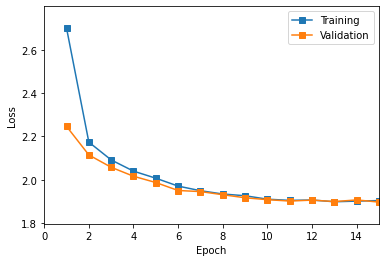

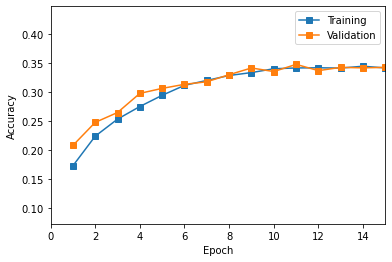

In [24]:
from layers import DropoutLayer
dropout_rate = 0.5
batch_size = 100
max_epoch = 15
init_std = 0.01

learning_rate = 0.0025
weight_decay = 0.010
dropout_rate = 0.25

disp_freq = 10

# build your network
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

dropout = Network()
dropout.add(ConvLayer(1, 16, 3, 1))
dropout.add(ReLULayer())
dropout.add(MaxPoolingLayer(2, 0))
dropout.add(ConvLayer(16, 32, 3, 1))
dropout.add(ReLULayer())
dropout.add(MaxPoolingLayer(2, 0))
dropout.add(ReshapeLayer((batch_size, 32, 7, 7), (batch_size, 1568)))
dropout.add(FCLayer(1568, 128))
dropout.add(ReLULayer())
dropout.add(DropoutLayer(dropout_rate))
dropout.add(FCLayer(128, 64))
dropout.add(ReLULayer())
dropout.add(DropoutLayer(dropout_rate))
dropout.add(FCLayer(64, 32))
dropout.add(ReLULayer())
dropout.add(DropoutLayer(dropout_rate))
dropout.add(FCLayer(32, 10))



# training
dropout.is_training = True
dropout, train_loss, train_acc, val_loss, val_acc = \
    train(dropout, criterion, sgd, dataset.train, dataset.validation, max_epoch, batch_size, disp_freq)

# testing

dropout.is_training = False
test(dropout, criterion, dataset.test, batch_size, disp_freq)

#Plot

plot_loss_and_acc({
    'Training': [train_loss, train_acc], 
    'Validation': [val_loss, val_acc]
})